## Bulldozers price prediction using regression analysis

In this project, we will try to tackle this problem of predicting the price of bulldozers using past time series data. 
The dataset we will be working with is available in kaggle at https://www.kaggle.com/c/bluebook-for-bulldozers.

#### We will follow these steps in our project :
1. Problem definition
2. Data discovery
3. Evaluation metric
4. EDA
5. Modelling
6. Model tuning
7. Saving the model

In [1]:
#importing the libraries we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn
%matplotlib inline

# 1. Problem definition

The goal of the project is to predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuaration.  The data is sourced from auction result postings and includes information on usage and equipment configurations.

# 2. Data discovery

This dataset contains data used for predicting the sale price of bulldozers sold at auctions. We will import the data dictionary file that comes with the kaggle dataset zip folder.

After looking at the data discovery file, here is the list of key variables and their descriptions :

* SalesID: the uniue identifier of the sale
* MachineID: the unique identifier of a machine.  A machine can be sold multiple times
* saleprice: what the machine sold for at auction (only provided in train.csv)
* saledate: the date of the sale

You can check all the variables and their descriptions in this link : https://docs.google.com/spreadsheets/d/15G6rrmwu90Ls2DUrFgdWbHcko5hF14ApmBhzihgaoDo/edit?usp=sharing

# 3. Evaluation metric

> The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

# 4. EDA 

First, we will start by providing a Class Diagram for the dataset in order to understand it better.

<img src="diagramme.png"></img>

> The diagram provides an explaination of the dataset.

Now we can proceed to do further cleaning and analysis on our dataset.

In [2]:
#importing the dataset into a pd dataframe
df= pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False, parse_dates=["saledate"])
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [4]:
len(df)

412698

> some features have too many missing values that need to be dealt with.

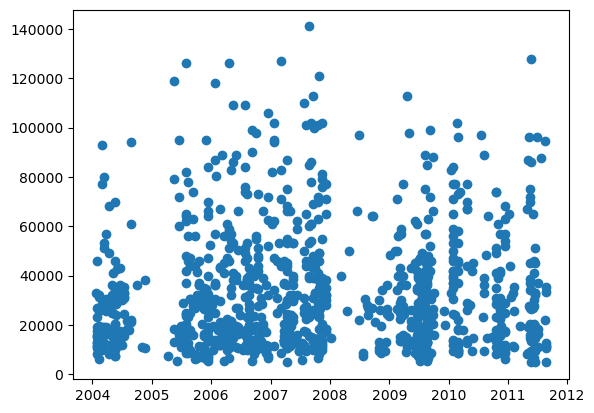

In [5]:
#plotting
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [3]:
#sorting the dataframe by date
df.sort_values(by=["saledate"],ascending=True,inplace=True)

In [7]:
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [4]:
#making a copy of our df to work on it
df_tmp=df.copy()

In [9]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [5]:
#feature engineering : adding more features to enrich our dataset
def add_feature(df,ft_name,ft_values) :
    """
    Add features to given dataframe, takes the dataframe, feature names and features values.
    """
    for i in range(len(ft_names)) :
        df[ft_names[i]]=ft_values[i]
    return df

In [6]:
ft_names=["salesYear","salesDay","salesMonth","salesDayOfWeek","salesDayOfYear"]
ft_values=[df.saledate.dt.year,df.saledate.dt.day,df.saledate.dt.month,df.saledate.dt.dayofweek,df.saledate.dt.dayofyear]
df_tmp=add_feature(df_tmp,ft_names,ft_values)

In [12]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


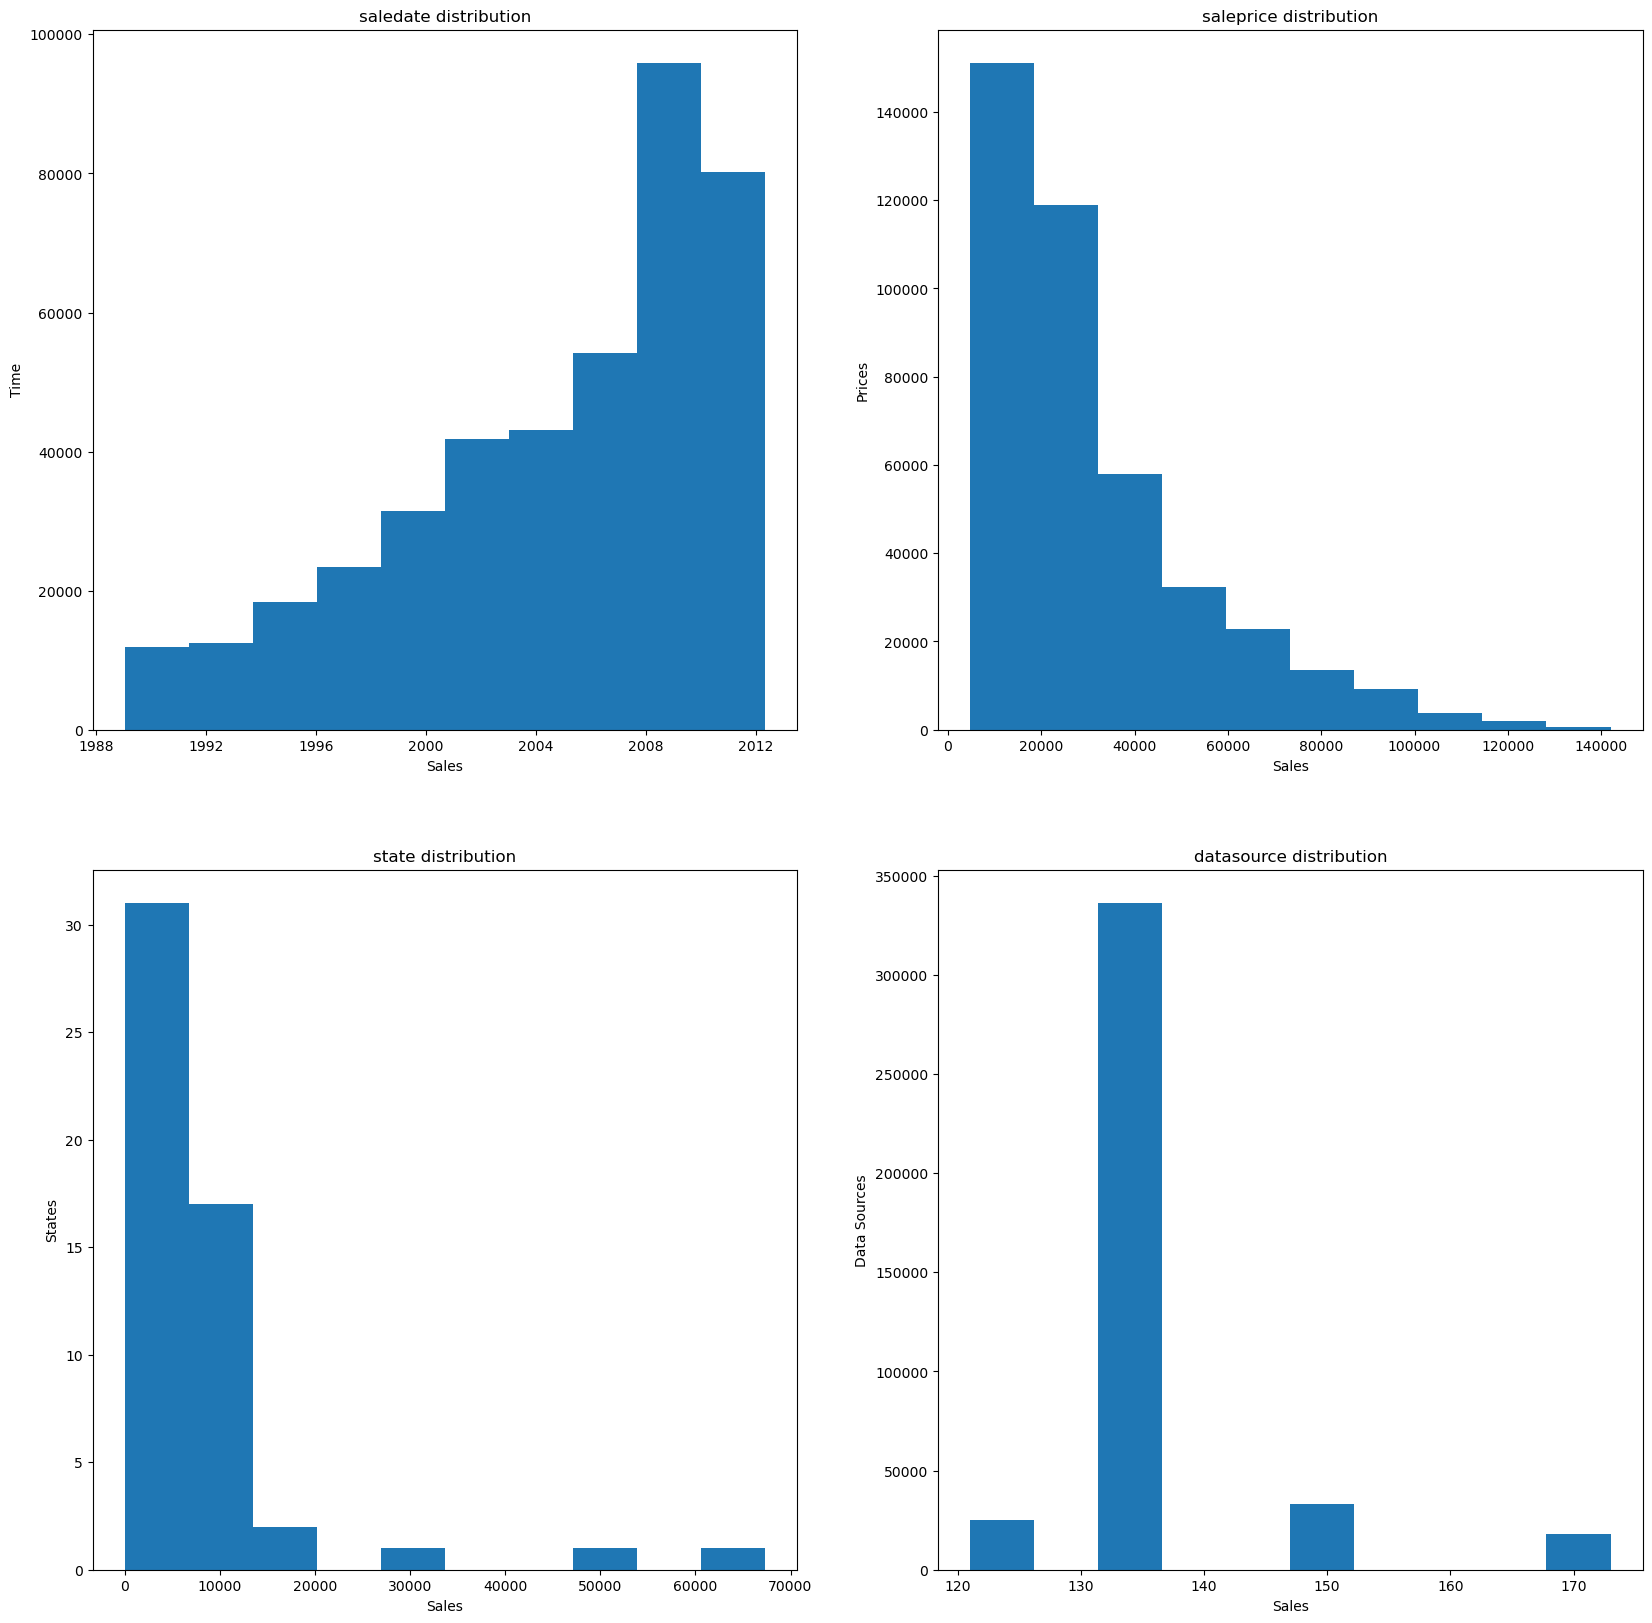

In [13]:
#plotting the dist of saledate,saleprice,state and datasource
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(20,20))
ax1.hist(df_tmp["saledate"])
ax1.set(xlabel="Sales",ylabel="Time",title="saledate distribution")
ax2.hist(df_tmp["SalePrice"])
ax2.set(xlabel="Sales",ylabel="Prices",title="saleprice distribution")
ax3.hist(df_tmp["state"].value_counts())
ax3.set(xlabel="Sales",ylabel="States",title="state distribution")
ax4.hist(df_tmp["datasource"]);
ax4.set(xlabel="Sales",ylabel="Data Sources",title="datasource distribution");

## Data Preprocessing

### Turning categories into numbers

In [14]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 1

In [7]:
#turning strings into pandas categories (Label encoding)
for label,content in df_tmp.items() :
    if content.dtype=="O" :
        df_tmp[label]=content.astype("category")

In [16]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   category      
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  category      
 11  fiBaseModel               412698 non-null  category      
 1

In [17]:
df_tmp["state"].cat.codes.head()

205615    43
274835     8
141296     8
212552     8
62755      8
dtype: int8

In [8]:
for label,content in df_tmp.items() :
    print(content.dtype)

int64
float64
int64
int64
int64
float64
int64
float64
category
datetime64[ns]
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
int64
int64
int64
int64
int64


### Handling numerical missing values

In [9]:
for label, content in df_tmp.items() :
    if content.dtype in ["float64","int64"] :
        if pd.isnull(content).sum() :
            df_tmp[label+"_is_missing"]=pd.isnull(content)
            df_tmp[label]=content.fillna(content.median())

In [29]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
saledate                                    0
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                         

### Handling categorical missing values

In [11]:
for label,content in df_tmp.items() :
    if content.dtype=="category" :
        df_tmp[label+"_is_missing"]=content.isnull()
        df_tmp[label]=content.cat.codes+1

In [36]:
df_tmp.isna().sum()[:53]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
saledate                    0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock 

In [10]:
#removing the saledate column
df_tmp.drop("saledate",axis=1,inplace=True)

> Now that our data is all numerical and has no missing values, we should be able to start modelling.

# 5. Modelling 

In [19]:
#splitting data into validation and training sets
df_train=df_tmp[df_tmp["salesYear"]!=2012]
df_valid=df_tmp[df_tmp["salesYear"]==2012]

In [25]:
len(df_valid),len(df_train)

(11573, 401125)

In [26]:
#splitting data into X and y 
X_train,y_train,X_valid,y_valid=df_train.drop("SalePrice",axis=1),df_train["SalePrice"],df_valid.drop("SalePrice",axis=1),df_valid["SalePrice"]

In [32]:
#building an evaluation function
def evaluation_function(models,y_true,X_set) :
    """
    Returns a dictionary of model names and their respective RMSLE metric scores
    """
    from sklearn.metrics import mean_squared_log_error
    rmsle={}
    for name,model in models.items() :
        rmsle[name]=np.sqrt(mean_squared_log_error(y_true,model.predict(X_set)))
    return rmsle

In [30]:
#building the baseline model
baseline=RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)
baseline.fit(X_train,y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [49]:
#evaluating the model using our function
models={"Baseline" : baseline}
evaluation_function(models,y_valid,X_valid)

{'Baseline': 0.2933375745468615}

# 6. Hyperparameter tuning

### Hyperparameter tuning using RandomizedSearchCV 

In [36]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
grid_rs={"n_estimators" : n_estimators,
         'max_features': max_features,
         'max_depth': max_depth,
         'min_samples_split': min_samples_split,
         'min_samples_leaf': min_samples_leaf,
         'bootstrap': bootstrap,
         "max_samples" : [10000]}

rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),param_distributions=grid_rs,n_iter=2,cv=5,verbose=True)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\hp\time_series_regression_project\env\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\time_series_regression_project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\time_series_regression_project\env\Lib\site-packages\sklearn\ensemble\_forest.py", line 397, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

  wa

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=True)

In [37]:
rs_model.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

**Note** : These results are not necessarly the best because we haven't gone through all the possible combinations of grid_rs. so in a attempt to get better results, i ran this code on a better computer but with 100 iterations instead of 2, and it gave these following parameters as the best :

* n_estimators = 40
* min_samples_leaf = 1
* min_samples_split = 14
* max_features = 0.5
* max_depth = default
* bootstrap = True

In [40]:
#building a model with the best rs params
best_rs_model=RandomForestRegressor(n_estimators = 40,min_samples_leaf = 1,min_samples_split = 14,max_features = 0.5, n_jobs=-1, random_state=42)
best_rs_model.fit(X_train,y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [50]:
#evaluating the best model and comparing it to the baseline
models["best_rs_model"]=best_rs_model
results=evaluation_function(models,y_valid,X_valid)

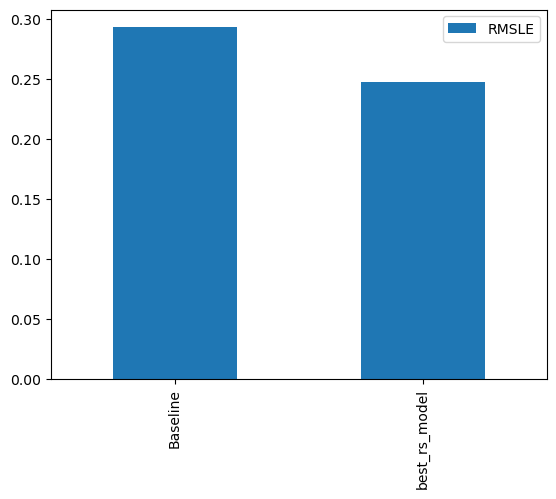

In [52]:
pd.DataFrame(results,index=["RMSLE"]).T.plot(kind='bar');

> As we can see, the best_rs_model did extremely better than the baseline, so we're keeping the best_rs_model. 

# 7. Making predictions on the test set

In [94]:
#importing the test set 
df_test=pd.read_csv("data/bluebook-for-bulldozers/Test.csv",low_memory=False,parse_dates=["saledate"])
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688.0,28555.0,6038.0,8940.0,2286.0
UsageBand,Low,High,Medium,High,Low
saledate,2012-05-03 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00
fiModelDesc,580G,936,EC210BLC,330CL,650K


#### As we can see, the test set is still not preprocessed, so it cannot be given to our model to predict on it, Therefore, we need to preprocess it first.

### Preprocessing the test data

In [95]:
#sorting the dataframe by date
df_test.sort_values(by=["saledate"],ascending=True,inplace=True)

#feature engineering
ft_names=["salesYear","salesDay","salesMonth","salesDayOfWeek","salesDayOfYear"]
ft_values=[df_test.saledate.dt.year,df_test.saledate.dt.day,df_test.saledate.dt.month,df_test.saledate.dt.dayofweek,df_test.saledate.dt.dayofyear]
df_test=add_feature(df_test,ft_names,ft_values)

#turning strings into pandas categories (Label encoding)
for label,content in df_test.items() :
    if content.dtype=="O" :
        df_test[label]=content.astype("category")

#handling missing numerical values
for label, content in df_test.items() :
    if content.dtype in ["float64","int64"] :
        if pd.isnull(content).sum() :
            df_test[label+"_is_missing"]=pd.isnull(content)
            df_test[label]=content.fillna(content.median())
        if label=="auctioneerID" :
            df_test[label+"_is_missing"]=False

#handling missing categorical values 
for label,content in df_test.items() :
    if content.dtype=="category" :
        df_test[label+"_is_missing"]=content.isnull()
        df_test[label]=content.cat.codes+1

#removing the saledate column
df_test.drop("saledate",axis=1,inplace=True)

In [98]:
df_test.shape,X_train.shape

((12457, 102), (401125, 102))

Now that our test dataset is in the same format as the training and validation sets, we can now make the predictions on it.

In [101]:
test_preds=best_rs_model.predict(df_test)

**Note** : the below cell is just for formatting the predictions the same way kaggle want them.

In [102]:
kaggle_submission={"SalesID" : df_test["SalesID"],
                   "SalePrice": test_preds}
kaggle_submission_AE=pd.DataFrame(kaggle_submission)

In [103]:
kaggle_submission_AE.head()

,SalesID,SalePrice
1408,4317459,9889.476709
1023,4249784,18127.307912
1728,4392603,23299.895028
1167,4274831,29708.955716
1594,4362801,13464.193372


# 8. Feature Importance

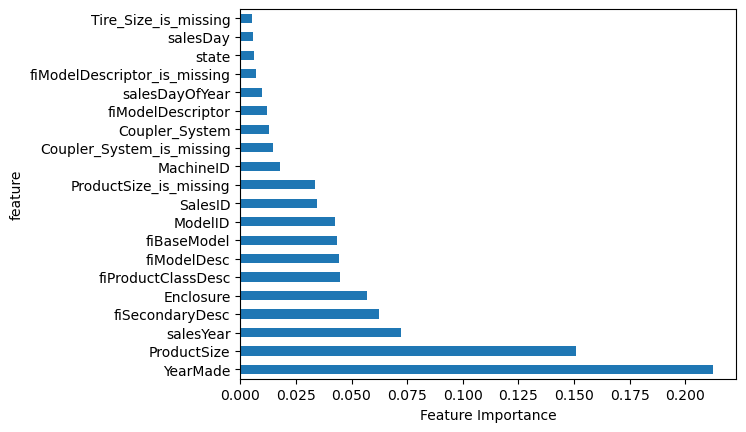

In [153]:
feature_importance=pd.DataFrame({"feature":df_test.columns,"feature importance" : best_rs_model.feature_importances_}).sort_values(by=["feature importance"],ascending=False)
feature_importance[:20].plot(x="feature",kind="barh",legend=False,xlabel="Feature Importance");